# ***Projet LSI : DL - NLP - RNN - LSTM***

## **Libraries imports : 📗**

In [ ]:
!pip install tensorflow==2.7.0

     |████████████████████████████████| 489.6 MB 22 kB/s 
     |████████████████████████████████| 1.3 MB 39.2 MB/s 
     |████████████████████████████████| 463 kB 54.9 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Successfully uninstalled gast-0.5.3
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.8.0
    Uninstalling tensorflow-2.8.0:
      Successfully uninstalled tensorflow-2.8.0


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
import re
import string 
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers
import joblib
import pickle


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
tf.version

<module 'tensorflow._api.v2.version' from '/usr/local/lib/python3.7/dist-packages/tensorflow/_api/v2/version/__init__.py'>

In [168]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")


train_demo = df_train.copy()

## **EDA ( Exploratory data analysis ) :**

In [76]:
df_train.shape

(7613, 5)

In [77]:
df_test.shape

(3263, 2)

In [78]:
df_train.head(40)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


In [79]:
df_test.head(40)

,text,final_text
0,"[happened, terrible, car, crash]",happened terrible car crash
1,"[heard, earthquake, different, city, stay, saf...",heard earthquake different city stay safe ever...
2,"[forest, fire, spot, pond, goose, fleeing, acr...",forest fire spot pond goose fleeing across str...
3,"[apocalypse, lighting, spokane, wildfire]",apocalypse lighting spokane wildfire
4,"[typhoon, soudelor, kill, china, taiwan]",typhoon soudelor kill china taiwan
5,"[shakingits, earthquake]",shakingits earthquake
6,"[theyd, probably, still, show, life, arsenal, ...",theyd probably still show life arsenal yesterd...
7,[hey],hey
8,"[nice, hat]",nice hat
9,[fuck],fuck


In [80]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [81]:
df_train.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

*Notice that we have many null value at 'location' .
Also the 'id' and 'keyword' does make a lot of sense in our case. That's why, later on , during the feature selection , we can remove them 😀 .*

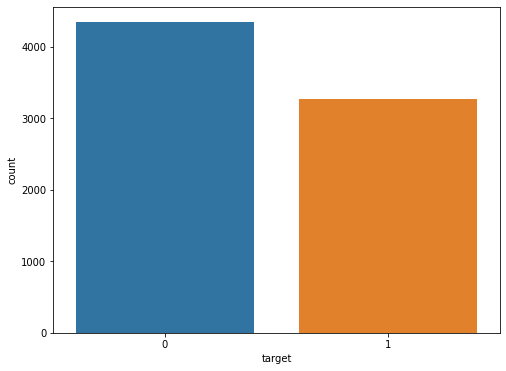

In [82]:
plt.figure(figsize=(8,6))
sns.countplot(x='target',data=df_train)

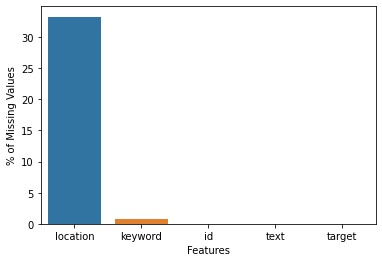

In [83]:
miss_per = (df_train.isnull().sum()/len(df_train))*100
miss_per = miss_per.sort_values(ascending=False)

sns.barplot(x=miss_per.index, y=miss_per,data=df_train['location'])
plt.xlabel('Features')
plt.ylabel('% of Missing Values')
plt.show()

*Notice that we have a lot of null values for the 'location' column !* 

In [84]:
target_tab = df_train.groupby('target').count()['text'].reset_index().sort_values(by='text',ascending=False)
target_tab

,target,text
0,0,4342
1,1,3271


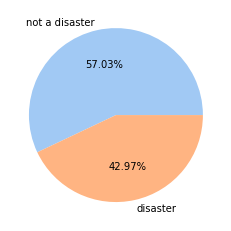

In [85]:
disaster_tweets = df_train.groupby(['target']).count()['id'][0]
non_disaster_tweets = df_train.groupby(['target']).count()['id'][1]

data = [disaster_tweets, non_disaster_tweets]
colors = sns.color_palette('pastel')
labels = ['not a disaster', 'disaster']
plt.pie(data, colors = colors,labels=labels,autopct = '%.2f%%')
plt.show()

In [86]:
train_demo['split_list'] = train_demo['text'].apply(lambda x:str(x).split())
top = Counter([item for sublist in train_demo['split_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(15))
temp.columns = ['Common words','count']
temp.style.background_gradient(cmap='Blues')

,Common words,count
0,the,2575
1,a,1845
2,to,1805
3,in,1757
4,of,1722
5,and,1302
6,I,1197
7,for,820
8,is,814
9,on,773


In [87]:
fig = px.treemap(temp, path=['Common words'], values='count',title='Most Common Words tree')
fig.show()

###**WordCloud of common words used in tweets related to a disaster**

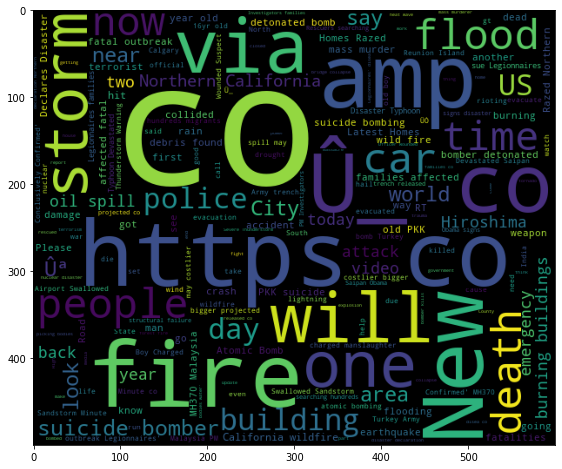

In [88]:
word_1 = ''.join(list(df_train[df_train['target']==1]['text']))
word_1 = WordCloud(width=600, height=500).generate(word_1)
plt.figure(figsize=(11, 8))
plt.imshow(word_1)
plt.show()

###****Word cloud of common words used in tweets that unrelated to a disaster****

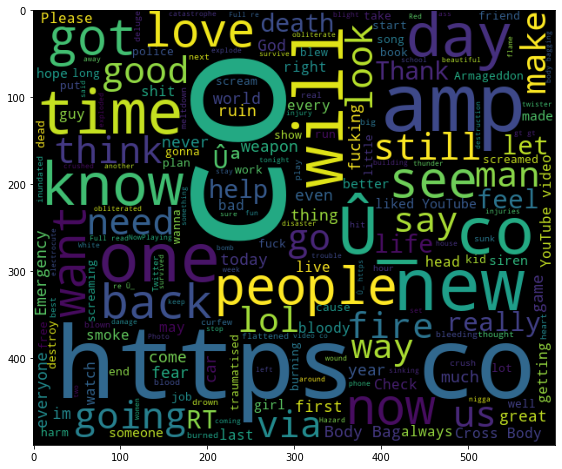

In [89]:
word_2 = ' '.join(list(df_train[df_train['target']==0]['text']))
word_2 = WordCloud(width=600, height=500).generate(word_2)
plt.figure(figsize=(11, 8))
plt.imshow(word_2)
plt.show()

*this last ' Word Cloud ' did help us to notice some words that we should take care of during our nlp process !*

## **Feature selection**

After doing our EDA, we can see that we have a lot of NaN values for the 'Location' and 'Keyword' columns.
Also, in our case, the columns : 'ID' - 'Location' - 'Keyword' doesn't make a lot of sense, so we can just drop them.

In [90]:
train_demo.drop(['id','keyword','location'],axis=1,inplace=True)

## **NLP Preprocessing :**

####**Removing : Stopwords - Url - Html - Emojis - Symboles ...:**

In [91]:
train_demo

,text,target,split_list
0,Our Deeds are the Reason of this #earthquake M...,1,"[Our, Deeds, are, the, Reason, of, this, #eart..."
1,Forest fire near La Ronge Sask. Canada,1,"[Forest, fire, near, La, Ronge, Sask., Canada]"
2,All residents asked to 'shelter in place' are ...,1,"[All, residents, asked, to, 'shelter, in, plac..."
3,"13,000 people receive #wildfires evacuation or...",1,"[13,000, people, receive, #wildfires, evacuati..."
4,Just got sent this photo from Ruby #Alaska as ...,1,"[Just, got, sent, this, photo, from, Ruby, #Al..."
...,...,...,...
7608,Two giant cranes holding a bridge collapse int...,1,"[Two, giant, cranes, holding, a, bridge, colla..."
7609,@aria_ahrary @TheTawniest The out of control w...,1,"[@aria_ahrary, @TheTawniest, The, out, of, con..."
7610,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,"[M1.94, [01:04, UTC]?5km, S, of, Volcano, Hawa..."
7611,Police investigating after an e-bike collided ...,1,"[Police, investigating, after, an, e-bike, col..."


In [92]:
transformer_regex = train_demo.replace(regex={
    ' AFAIK ':'As Far As I Know',
    ' AFK ':' Away From Keyboard ',
    ' ASAP ':' As Soon As Possible ',
    ' ATK ':' At The Keyboard ',
    ' ATM ':' At The Moment ',
    ' A3 ':' Anytime, Anywhere, Anyplace ',
    ' BAK ':' Back At Keyboard ',
    ' BBL ':' Be Back Later ',
    ' BBS ':' Be Back Soon ',
    ' BFN ':' Bye For Now ',
    ' B4N ':' Bye For Now ',
    ' BRB ':' Be Right Back ',
    ' BRT ':' Be Right There ',
    ' BTW ':' By The Way ',
    ' B4 ':' Before ',
    ' B4N ':' Bye For Now ',
    ' CU ':' See You ',
    ' CUL8R ':' See You Later ',
    ' CYA ':' See You ',
    ' FAQ ':' Frequently Asked Questions ',
    ' FC ':' Fingers Crossed ',
    ' FWIW ':" For What It's Worth ",
    ' FYI ':' For Your Information ',
    ' GAL ':' Get A Life ',
    ' GG ':' Good Game ',
    ' GN ':' Good Night ',
    ' GMTA ':' Great Minds Think Alike ',
    ' GR8 ':" Great! ",
    ' G9 ':" Genius ",
    ' IC ':" I See ",
    ' ICQ ':" I Seek you ",
    ' ILU ':" I Love You ",
    ' IMHO ':" In My Honest ",
    ' IMO ':" In My Opinion ",
    ' IOW ':" In Other Words ",
    ' IRL ':" In Real Life ",
    ' KISS ':" Keep It Simple, Stupid ",
    ' LDR ':" Long Distance Relationship ",
    ' LMAO ':" Laugh My Ass ",
    ' LOL ':" Laughing Out Loud ",
    ' LTNS ':" Long Time No See ",
    ' L8R ':" Later ",
    ' MTE ':" My Thoughts Exactly ",
    ' M8 ':" Mate ",
    ' NRN ':" No Reply Necessary ",
    ' OIC ':" Oh I See ",
    ' PITA ':" Pain In The Ass ",
    ' PRT ':" Party ",
    ' PRW ':" Parents Are Watching ",
    ' ROFL ':" Rolling On The Floor Laughing ",
    ' ROFLOL ':" Rolling On The Floor Laughing Out Loud ",
    ' ROTFLMAO ':" Rolling On The Floor Laughing My Ass ",
    ' SK8 ':" Skate ",
    ' STATS ':" Your sex and age ",
    ' ASL ':" Age, Sex, Location ",
    ' THX ':" Thank You ",
    ' TTFN ':" Ta-Ta For Now! ",
    ' TTYL ':" Talk To You Later ",
    ' U ':" You ",
    ' U2 ':" You Too",
    ' U4E ':" Yours For Ever ",
    ' WB ':" Welcome Back ",
    ' WTF ':" What The Fuck ",
    ' WTG ':" Way To Go! ",
    ' WUF ':" Where Are You From? ",
    ' W8 ':" Wait",},inplace=True)


In [2]:
def remove_stopwords(text) : 
    stop = stopwords.words('english')
    return " ".join([word for word in text.split() if word not in (stop)])

In [3]:
def remove_html(text) :
    html = re.compile(r"<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});")
    return re.sub(html, "", text)

In [4]:
def remove_emojis(text):
    emoji_pattern = re.compile(
        '['
        u'\U0001F600-\U0001F64F'  # emoticons
        u'\U0001F300-\U0001F5FF'  # symbols & pictographs
        u'\U0001F680-\U0001F6FF'  # transport & map symbols
        u'\U0001F1E0-\U0001F1FF'  # flags (iOS)
        u'\U00002702-\U000027B0'
        u'\U000024C2-\U0001F251'
        ']+',
        flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [5]:
def clean_text(text) :
    
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = remove_html(text)
    text = remove_emojis(text)
    text = remove_stopwords(text)
    return text

In [93]:
train_demo['cleaned_text'] = train_demo['text'].apply( lambda x:clean_text(x))

In [94]:
train_demo

,text,target,split_list,cleaned_text
0,Our Deeds are the Reason of this #earthquake M...,1,"[Our, Deeds, are, the, Reason, of, this, #eart...",deeds reason earthquake may allah forgive us
1,Forest fire near La Ronge Sask. Canada,1,"[Forest, fire, near, La, Ronge, Sask., Canada]",forest fire near la ronge sask canada
2,All residents asked to 'shelter in place' are ...,1,"[All, residents, asked, to, 'shelter, in, plac...",residents asked shelter place notified officer...
3,"13,000 people receive #wildfires evacuation or...",1,"[13,000, people, receive, #wildfires, evacuati...",people receive wildfires evacuation orders cal...
4,Just got sent this photo from Ruby #Alaska as ...,1,"[Just, got, sent, this, photo, from, Ruby, #Al...",got sent photo ruby alaska smoke wildfires pou...
...,...,...,...,...
7608,Two giant cranes holding a bridge collapse int...,1,"[Two, giant, cranes, holding, a, bridge, colla...",two giant cranes holding bridge collapse nearb...
7609,@aria_ahrary @TheTawniest The out of control w...,1,"[@aria_ahrary, @TheTawniest, The, out, of, con...",ariaahrary thetawniest control wild fires cali...
7610,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,"[M1.94, [01:04, UTC]?5km, S, of, Volcano, Hawa...",volcano hawaii
7611,Police investigating after an e-bike collided ...,1,"[Police, investigating, after, an, e-bike, col...",police investigating ebike collided car little...


In [95]:
# Tokenizing our cleaned text : 

train_demo['clean_text_tokenized'] = train_demo['cleaned_text'].apply(word_tokenize)

train_demo

,text,target,split_list,cleaned_text,clean_text_tokenized
0,Our Deeds are the Reason of this #earthquake M...,1,"[Our, Deeds, are, the, Reason, of, this, #eart...",deeds reason earthquake may allah forgive us,"[deeds, reason, earthquake, may, allah, forgiv..."
1,Forest fire near La Ronge Sask. Canada,1,"[Forest, fire, near, La, Ronge, Sask., Canada]",forest fire near la ronge sask canada,"[forest, fire, near, la, ronge, sask, canada]"
2,All residents asked to 'shelter in place' are ...,1,"[All, residents, asked, to, 'shelter, in, plac...",residents asked shelter place notified officer...,"[residents, asked, shelter, place, notified, o..."
3,"13,000 people receive #wildfires evacuation or...",1,"[13,000, people, receive, #wildfires, evacuati...",people receive wildfires evacuation orders cal...,"[people, receive, wildfires, evacuation, order..."
4,Just got sent this photo from Ruby #Alaska as ...,1,"[Just, got, sent, this, photo, from, Ruby, #Al...",got sent photo ruby alaska smoke wildfires pou...,"[got, sent, photo, ruby, alaska, smoke, wildfi..."
...,...,...,...,...,...
7608,Two giant cranes holding a bridge collapse int...,1,"[Two, giant, cranes, holding, a, bridge, colla...",two giant cranes holding bridge collapse nearb...,"[two, giant, cranes, holding, bridge, collapse..."
7609,@aria_ahrary @TheTawniest The out of control w...,1,"[@aria_ahrary, @TheTawniest, The, out, of, con...",ariaahrary thetawniest control wild fires cali...,"[ariaahrary, thetawniest, control, wild, fires..."
7610,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,"[M1.94, [01:04, UTC]?5km, S, of, Volcano, Hawa...",volcano hawaii,"[volcano, hawaii]"
7611,Police investigating after an e-bike collided ...,1,"[Police, investigating, after, an, e-bike, col...",police investigating ebike collided car little...,"[police, investigating, ebike, collided, car, ..."


In [96]:
train_demo

,text,target,split_list,cleaned_text,clean_text_tokenized
0,Our Deeds are the Reason of this #earthquake M...,1,"[Our, Deeds, are, the, Reason, of, this, #eart...",deeds reason earthquake may allah forgive us,"[deeds, reason, earthquake, may, allah, forgiv..."
1,Forest fire near La Ronge Sask. Canada,1,"[Forest, fire, near, La, Ronge, Sask., Canada]",forest fire near la ronge sask canada,"[forest, fire, near, la, ronge, sask, canada]"
2,All residents asked to 'shelter in place' are ...,1,"[All, residents, asked, to, 'shelter, in, plac...",residents asked shelter place notified officer...,"[residents, asked, shelter, place, notified, o..."
3,"13,000 people receive #wildfires evacuation or...",1,"[13,000, people, receive, #wildfires, evacuati...",people receive wildfires evacuation orders cal...,"[people, receive, wildfires, evacuation, order..."
4,Just got sent this photo from Ruby #Alaska as ...,1,"[Just, got, sent, this, photo, from, Ruby, #Al...",got sent photo ruby alaska smoke wildfires pou...,"[got, sent, photo, ruby, alaska, smoke, wildfi..."
...,...,...,...,...,...
7608,Two giant cranes holding a bridge collapse int...,1,"[Two, giant, cranes, holding, a, bridge, colla...",two giant cranes holding bridge collapse nearb...,"[two, giant, cranes, holding, bridge, collapse..."
7609,@aria_ahrary @TheTawniest The out of control w...,1,"[@aria_ahrary, @TheTawniest, The, out, of, con...",ariaahrary thetawniest control wild fires cali...,"[ariaahrary, thetawniest, control, wild, fires..."
7610,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,"[M1.94, [01:04, UTC]?5km, S, of, Volcano, Hawa...",volcano hawaii,"[volcano, hawaii]"
7611,Police investigating after an e-bike collided ...,1,"[Police, investigating, after, an, e-bike, col...",police investigating ebike collided car little...,"[police, investigating, ebike, collided, car, ..."


In [6]:
lemma = WordNetLemmatizer()

In [97]:
for row in train_demo['clean_text_tokenized']:
  for index, word in enumerate(row):
    row[index] = lemma.lemmatize(word)
    


In [98]:
train_demo.head(30)

,text,target,split_list,cleaned_text,clean_text_tokenized
0,Our Deeds are the Reason of this #earthquake M...,1,"[Our, Deeds, are, the, Reason, of, this, #eart...",deeds reason earthquake may allah forgive us,"[deed, reason, earthquake, may, allah, forgive..."
1,Forest fire near La Ronge Sask. Canada,1,"[Forest, fire, near, La, Ronge, Sask., Canada]",forest fire near la ronge sask canada,"[forest, fire, near, la, ronge, sask, canada]"
2,All residents asked to 'shelter in place' are ...,1,"[All, residents, asked, to, 'shelter, in, plac...",residents asked shelter place notified officer...,"[resident, asked, shelter, place, notified, of..."
3,"13,000 people receive #wildfires evacuation or...",1,"[13,000, people, receive, #wildfires, evacuati...",people receive wildfires evacuation orders cal...,"[people, receive, wildfire, evacuation, order,..."
4,Just got sent this photo from Ruby #Alaska as ...,1,"[Just, got, sent, this, photo, from, Ruby, #Al...",got sent photo ruby alaska smoke wildfires pou...,"[got, sent, photo, ruby, alaska, smoke, wildfi..."
5,#RockyFire Update => California Hwy. 20 closed...,1,"[#RockyFire, Update, =>, California, Hwy., 20,...",rockyfire update california hwy closed directi...,"[rockyfire, update, california, hwy, closed, d..."
6,#flood #disaster Heavy rain causes flash flood...,1,"[#flood, #disaster, Heavy, rain, causes, flash...",flood disaster heavy rain causes flash floodin...,"[flood, disaster, heavy, rain, cause, flash, f..."
7,I'm on top of the hill and I can see a fire in...,1,"[I'm, on, top, of, the, hill, and, I, can, see...",im top hill see fire woods,"[im, top, hill, see, fire, wood]"
8,There's an emergency evacuation happening now ...,1,"[There's, an, emergency, evacuation, happening...",theres emergency evacuation happening building...,"[there, emergency, evacuation, happening, buil..."
9,I'm afraid that the tornado is coming to our a...,1,"[I'm, afraid, that, the, tornado, is, coming, ...",im afraid tornado coming area,"[im, afraid, tornado, coming, area]"


In [99]:
training_df = train_demo.copy()

In [100]:
training_df

,text,target,split_list,cleaned_text,clean_text_tokenized
0,Our Deeds are the Reason of this #earthquake M...,1,"[Our, Deeds, are, the, Reason, of, this, #eart...",deeds reason earthquake may allah forgive us,"[deed, reason, earthquake, may, allah, forgive..."
1,Forest fire near La Ronge Sask. Canada,1,"[Forest, fire, near, La, Ronge, Sask., Canada]",forest fire near la ronge sask canada,"[forest, fire, near, la, ronge, sask, canada]"
2,All residents asked to 'shelter in place' are ...,1,"[All, residents, asked, to, 'shelter, in, plac...",residents asked shelter place notified officer...,"[resident, asked, shelter, place, notified, of..."
3,"13,000 people receive #wildfires evacuation or...",1,"[13,000, people, receive, #wildfires, evacuati...",people receive wildfires evacuation orders cal...,"[people, receive, wildfire, evacuation, order,..."
4,Just got sent this photo from Ruby #Alaska as ...,1,"[Just, got, sent, this, photo, from, Ruby, #Al...",got sent photo ruby alaska smoke wildfires pou...,"[got, sent, photo, ruby, alaska, smoke, wildfi..."
...,...,...,...,...,...
7608,Two giant cranes holding a bridge collapse int...,1,"[Two, giant, cranes, holding, a, bridge, colla...",two giant cranes holding bridge collapse nearb...,"[two, giant, crane, holding, bridge, collapse,..."
7609,@aria_ahrary @TheTawniest The out of control w...,1,"[@aria_ahrary, @TheTawniest, The, out, of, con...",ariaahrary thetawniest control wild fires cali...,"[ariaahrary, thetawniest, control, wild, fire,..."
7610,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,"[M1.94, [01:04, UTC]?5km, S, of, Volcano, Hawa...",volcano hawaii,"[volcano, hawaii]"
7611,Police investigating after an e-bike collided ...,1,"[Police, investigating, after, an, e-bike, col...",police investigating ebike collided car little...,"[police, investigating, ebike, collided, car, ..."


In [101]:
top = Counter([item for sublist in training_df['clean_text_tokenized'] for item in sublist])
temp_clean = pd.DataFrame(top.most_common(30))
temp_clean.columns = ['Common words','count']
temp_clean.style.background_gradient(cmap='Blues')

,Common words,count
0,fire,348
1,like,346
2,amp,298
3,im,294
4,get,254
5,u,226
6,new,223
7,via,220
8,one,203
9,people,199


In [102]:
training_df.shape

(7613, 5)

In [103]:
fig = px.treemap(temp_clean, path=['Common words'], values='count',title='After finishing cleaning our texts, here is a treeMap of the most used words')
fig.show()

#### **Creating corpus for our cleaned tokenized text :**

In [104]:
corpus = []
for sentences in list(training_df['clean_text_tokenized']) :
    corpus.append(' '.join(sentences))
len(corpus)

7613

In [105]:
corpus

['deed reason earthquake may allah forgive u',
 'forest fire near la ronge sask canada',
 'resident asked shelter place notified officer evacuation shelter place order expected',
 'people receive wildfire evacuation order california',
 'got sent photo ruby alaska smoke wildfire pours school',
 'rockyfire update california hwy closed direction due lake county fire cafire wildfire',
 'flood disaster heavy rain cause flash flooding street manitou colorado spring area',
 'im top hill see fire wood',
 'there emergency evacuation happening building across street',
 'im afraid tornado coming area',
 'three people died heat wave far',
 'haha south tampa getting flooded hah wait second live south tampa gon na gon na fvck flooding',
 'raining flooding florida tampabay tampa day ive lost count',
 'flood bago myanmar arrived bago',
 'damage school bus multi car crash breaking',
 'whats man',
 'love fruit',
 'summer lovely',
 'car fast',
 'goooooooaaaaaal',
 'ridiculous',
 'london cool',
 'love ski

In [106]:
training_df['final_text'] = corpus

In [107]:
training_df

,text,target,split_list,cleaned_text,clean_text_tokenized,final_text
0,Our Deeds are the Reason of this #earthquake M...,1,"[Our, Deeds, are, the, Reason, of, this, #eart...",deeds reason earthquake may allah forgive us,"[deed, reason, earthquake, may, allah, forgive...",deed reason earthquake may allah forgive u
1,Forest fire near La Ronge Sask. Canada,1,"[Forest, fire, near, La, Ronge, Sask., Canada]",forest fire near la ronge sask canada,"[forest, fire, near, la, ronge, sask, canada]",forest fire near la ronge sask canada
2,All residents asked to 'shelter in place' are ...,1,"[All, residents, asked, to, 'shelter, in, plac...",residents asked shelter place notified officer...,"[resident, asked, shelter, place, notified, of...",resident asked shelter place notified officer ...
3,"13,000 people receive #wildfires evacuation or...",1,"[13,000, people, receive, #wildfires, evacuati...",people receive wildfires evacuation orders cal...,"[people, receive, wildfire, evacuation, order,...",people receive wildfire evacuation order calif...
4,Just got sent this photo from Ruby #Alaska as ...,1,"[Just, got, sent, this, photo, from, Ruby, #Al...",got sent photo ruby alaska smoke wildfires pou...,"[got, sent, photo, ruby, alaska, smoke, wildfi...",got sent photo ruby alaska smoke wildfire pour...
...,...,...,...,...,...,...
7608,Two giant cranes holding a bridge collapse int...,1,"[Two, giant, cranes, holding, a, bridge, colla...",two giant cranes holding bridge collapse nearb...,"[two, giant, crane, holding, bridge, collapse,...",two giant crane holding bridge collapse nearby...
7609,@aria_ahrary @TheTawniest The out of control w...,1,"[@aria_ahrary, @TheTawniest, The, out, of, con...",ariaahrary thetawniest control wild fires cali...,"[ariaahrary, thetawniest, control, wild, fire,...",ariaahrary thetawniest control wild fire calif...
7610,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,"[M1.94, [01:04, UTC]?5km, S, of, Volcano, Hawa...",volcano hawaii,"[volcano, hawaii]",volcano hawaii
7611,Police investigating after an e-bike collided ...,1,"[Police, investigating, after, an, e-bike, col...",police investigating ebike collided car little...,"[police, investigating, ebike, collided, car, ...",police investigating ebike collided car little...


In [108]:
training_df.drop(columns = ['text','split_list','cleaned_text','clean_text_tokenized'],inplace=True)

In [109]:
training_df

,target,final_text
0,1,deed reason earthquake may allah forgive u
1,1,forest fire near la ronge sask canada
2,1,resident asked shelter place notified officer ...
3,1,people receive wildfire evacuation order calif...
4,1,got sent photo ruby alaska smoke wildfire pour...
...,...,...
7608,1,two giant crane holding bridge collapse nearby...
7609,1,ariaahrary thetawniest control wild fire calif...
7610,1,volcano hawaii
7611,1,police investigating ebike collided car little...


## **Inisializing and training our LSTM Recurrent Neural Network model 🤖 :**

**RNN ❓❓ LSTM ❓ Word Embedding ❔ One-hot Encoding** 

* **RNN** : *Recurrent Neural Networks(RNN) are a type of Neural Network where the output from the previous step is fed as input to the current step. RNN's are mainly used for, Sequence Classification — Sentiment Classification & Video Classification. Sequence Labelling — Part of speech tagging & Named entity recognition*
________________________________________________________________________________

* **LSTM** *Long Short-Term Memory (LSTM) networks are a type of recurrent neural network capable of learning order dependence in sequence prediction problems.*
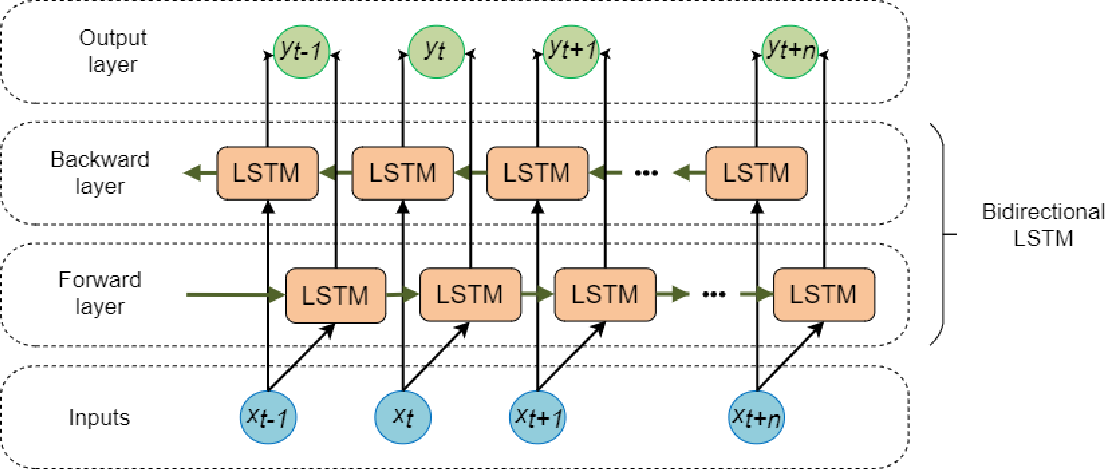
________________________________________________________________________________

* **Embedding** A word embedding layer maps a sequence of word indices to embedding vectors and learns the word embedding during training.*

________________________________________________________________________________
* **One-hot encoding** *One hot encoding can be defined as the essential process of converting the categorical data variables to be provided to machine and deep learning algorithms which in turn improve predictions as well as classification accuracy of a model.*

### **Creating our LSTM RNN model based on One-Hot Encoding - Embedding layer :**

In [276]:
VOC_SIZE = 20000

In [110]:
one_hot_represent = [one_hot(words,VOC_SIZE)for words in training_df['final_text']]

len(one_hot_represent)

7613

**Embedding layer representation :**

In [111]:
sent_length = 100 
embedded_docs = pad_sequences(one_hot_represent,padding='pre',maxlen=sent_length)

print(embedded_docs)

[[    0     0     0 ...  3825  1057  5911]
 [    0     0     0 ...  6375  4601 13206]
 [    0     0     0 ...   966 18111  7531]
 ...
 [    0     0     0 ...     0  2705  4310]
 [    0     0     0 ...  3233  5098  7861]
 [    0     0     0 ... 19194  3689  1444]]


### **Creating our LSTM model :**

In [151]:

opt = optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)


embedding_vector_features = 50
model = Sequential()

model.add(Embedding(VOC_SIZE,embedding_vector_features,input_length=sent_length))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(50,return_sequences = True)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(50,return_sequences = True)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(50)))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer= opt ,metrics=['accuracy'])

print(model.summary())

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 100, 50)           1000000   
                                                                 
 dropout_32 (Dropout)        (None, 100, 50)           0         
                                                                 
 bidirectional_24 (Bidirecti  (None, 100, 100)         40400     
 onal)                                                           
                                                                 
 dropout_33 (Dropout)        (None, 100, 100)          0         
                                                                 
 bidirectional_25 (Bidirecti  (None, 100, 100)         60400     
 onal)                                                           
                                                                 
 dropout_34 (Dropout)        (None, 100, 100)         

In [113]:
embedded_docs

array([[    0,     0,     0, ...,  3825,  1057,  5911],
       [    0,     0,     0, ...,  6375,  4601, 13206],
       [    0,     0,     0, ...,   966, 18111,  7531],
       ...,
       [    0,     0,     0, ...,     0,  2705,  4310],
       [    0,     0,     0, ...,  3233,  5098,  7861],
       [    0,     0,     0, ..., 19194,  3689,  1444]], dtype=int32)

### **Splitting our data to 18% testing data - 82% training data :**

In [114]:
y = training_df['target']

In [115]:
X_final=np.array(embedded_docs)
y_final=np.array(y)

In [119]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.18, random_state=42)

### **Training our model for 30 epochs and 1024 batch_size :**

Note: 
* Epche : *An epoch is a term used in machine learning and indicates the number of passes of the entire training dataset the machine learning algorithm has completed. Datasets are usually grouped into batches (especially when the amount of data is very large)*
* Batch_size : *Batch size is a term used in machine learning and refers to the number of training examples utilized in one iteration*

In [152]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs= 30,batch_size=1024)

Epoch 1/30
7/7 [==============================] - 47s 5s/step - loss: 0.6922 - accuracy: 0.5487 - val_loss: 0.6905 - val_accuracy: 0.5755
Epoch 2/30
7/7 [==============================] - 31s 4s/step - loss: 0.6898 - accuracy: 0.5692 - val_loss: 0.6880 - val_accuracy: 0.5755
Epoch 3/30
7/7 [==============================] - 30s 4s/step - loss: 0.6878 - accuracy: 0.5692 - val_loss: 0.6857 - val_accuracy: 0.5755
Epoch 4/30
7/7 [==============================] - 31s 4s/step - loss: 0.6855 - accuracy: 0.5692 - val_loss: 0.6832 - val_accuracy: 0.5755
Epoch 5/30
7/7 [==============================] - 30s 4s/step - loss: 0.6836 - accuracy: 0.5692 - val_loss: 0.6812 - val_accuracy: 0.5755
Epoch 6/30
7/7 [==============================] - 30s 4s/step - loss: 0.6819 - accuracy: 0.5692 - val_loss: 0.6798 - val_accuracy: 0.5755
Epoch 7/30
7/7 [==============================] - 30s 4s/step - loss: 0.6811 - accuracy: 0.5692 - val_loss: 0.6790 - val_accuracy: 0.5755
Epoch 8/30
7/7 [==================

**Great ! we reached 0.78 Validation accuracy 😀 !**

## **Visualizing Model accuracy / loss :**

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


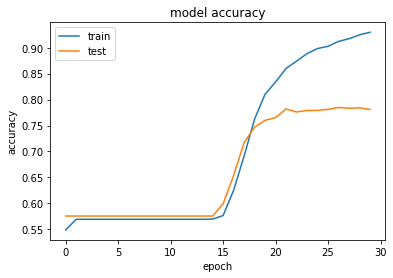

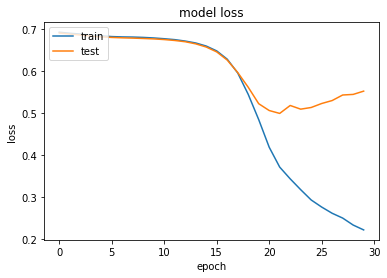

In [153]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## **Saving And Loading our model :**

In [154]:
joblib.dump(model, 'RNN_LSTM_model.pkl')

INFO:tensorflow:Assets written to: ram://717c7b21-2904-48c6-ace1-db7f316876cf/assets


INFO:tensorflow:Assets written to: ram://717c7b21-2904-48c6-ace1-db7f316876cf/assets


['RNN_LSTM_model.pkl']

In [155]:
loaded_model = joblib.load('RNN_LSTM_model.pkl')

In [3]:
# loaded_model = joblib.load('LSTM_model.pkl')

In [157]:
loaded_model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 100, 50)           1000000   
                                                                 
 dropout_32 (Dropout)        (None, 100, 50)           0         
                                                                 
 bidirectional_24 (Bidirecti  (None, 100, 100)         40400     
 onal)                                                           
                                                                 
 dropout_33 (Dropout)        (None, 100, 100)          0         
                                                                 
 bidirectional_25 (Bidirecti  (None, 100, 100)         60400     
 onal)                                                           
                                                                 
 dropout_34 (Dropout)        (None, 100, 100)         

## **Praparing our test submission DataSet :**

In [164]:
df_test

,text,final_text
0,"[happened, terrible, car, crash]",happened terrible car crash
1,"[heard, earthquake, different, city, stay, saf...",heard earthquake different city stay safe ever...
2,"[forest, fire, spot, pond, goose, fleeing, acr...",forest fire spot pond goose fleeing across str...
3,"[apocalypse, lighting, spokane, wildfire]",apocalypse lighting spokane wildfire
4,"[typhoon, soudelor, kill, china, taiwan]",typhoon soudelor kill china taiwan
...,...,...
3258,"[earthquake, safety, los, angeles, ûò, safety...",earthquake safety los angeles ûò safety faste...
3259,"[storm, ri, worse, last, hurricane, hardest, h...",storm ri worse last hurricane hardest hit yard...
3260,"[green, line, derailment, chicago]",green line derailment chicago
3261,"[meg, issue, hazardous, weather, outlook, hwo]",meg issue hazardous weather outlook hwo


### **Dropping unnecessary columns :**

In [169]:
df_test.drop(columns=['id','keyword','location'],inplace=True)

In [170]:
df_test

,text
0,Just happened a terrible car crash
1,"Heard about #earthquake is different cities, s..."
2,"there is a forest fire at spot pond, geese are..."
3,Apocalypse lighting. #Spokane #wildfires
4,Typhoon Soudelor kills 28 in China and Taiwan
...,...
3258,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,Storm in RI worse than last hurricane. My city...
3260,Green Line derailment in Chicago http://t.co/U...
3261,MEG issues Hazardous Weather Outlook (HWO) htt...


### **Let's clean our test data :**

In [171]:
transformer_regex = df_test.replace(regex={
    ' AFAIK ':'As Far As I Know',
    ' AFK ':' Away From Keyboard ',
    ' ASAP ':' As Soon As Possible ',
    ' ATK ':' At The Keyboard ',
    ' ATM ':' At The Moment ',
    ' A3 ':' Anytime, Anywhere, Anyplace ',
    ' BAK ':' Back At Keyboard ',
    ' BBL ':' Be Back Later ',
    ' BBS ':' Be Back Soon ',
    ' BFN ':' Bye For Now ',
    ' B4N ':' Bye For Now ',
    ' BRB ':' Be Right Back ',
    ' BRT ':' Be Right There ',
    ' BTW ':' By The Way ',
    ' B4 ':' Before ',
    ' B4N ':' Bye For Now ',
    ' CU ':' See You ',
    ' CUL8R ':' See You Later ',
    ' CYA ':' See You ',
    ' FAQ ':' Frequently Asked Questions ',
    ' FC ':' Fingers Crossed ',
    ' FWIW ':" For What It's Worth ",
    ' FYI ':' For Your Information ',
    ' GAL ':' Get A Life ',
    ' GG ':' Good Game ',
    ' GN ':' Good Night ',
    ' GMTA ':' Great Minds Think Alike ',
    ' GR8 ':" Great! ",
    ' G9 ':" Genius ",
    ' IC ':" I See ",
    ' ICQ ':" I Seek you ",
    ' ILU ':" I Love You ",
    ' IMHO ':" In My Honest ",
    ' IMO ':" In My Opinion ",
    ' IOW ':" In Other Words ",
    ' IRL ':" In Real Life ",
    ' KISS ':" Keep It Simple, Stupid ",
    ' LDR ':" Long Distance Relationship ",
    ' LMAO ':" Laugh My Ass ",
    ' LOL ':" Laughing Out Loud ",
    ' LTNS ':" Long Time No See ",
    ' L8R ':" Later ",
    ' MTE ':" My Thoughts Exactly ",
    ' M8 ':" Mate ",
    ' NRN ':" No Reply Necessary ",
    ' OIC ':" Oh I See ",
    ' PITA ':" Pain In The Ass ",
    ' PRT ':" Party ",
    ' PRW ':" Parents Are Watching ",
    ' ROFL ':" Rolling On The Floor Laughing ",
    ' ROFLOL ':" Rolling On The Floor Laughing Out Loud ",
    ' ROTFLMAO ':" Rolling On The Floor Laughing My Ass ",
    ' SK8 ':" Skate ",
    ' STATS ':" Your sex and age ",
    ' ASL ':" Age, Sex, Location ",
    ' THX ':" Thank You ",
    ' TTFN ':" Ta-Ta For Now! ",
    ' TTYL ':" Talk To You Later ",
    ' U ':" You ",
    ' U2 ':" You Too",
    ' U4E ':" Yours For Ever ",
    ' WB ':" Welcome Back ",
    ' WTF ':" What The Fuck ",
    ' WTG ':" Way To Go! ",
    ' WUF ':" Where Are You From? ",
    ' W8 ':" Wait",},inplace=True)


#### **Applying our 'clean_text' method that we already create before**

In [172]:
df_test['text'] = df_test['text'].apply( lambda x:clean_text(x))

In [173]:
df_test

,text
0,happened terrible car crash
1,heard earthquake different cities stay safe ev...
2,forest fire spot pond geese fleeing across str...
3,apocalypse lighting spokane wildfires
4,typhoon soudelor kills china taiwan
...,...
3258,earthquake safety los angeles ûò safety faste...
3259,storm ri worse last hurricane hardest hit yard...
3260,green line derailment chicago
3261,meg issues hazardous weather outlook hwo


In [174]:
df_test['text'] = df_test['text'].apply(word_tokenize)

In [175]:
df_test

,text
0,"[happened, terrible, car, crash]"
1,"[heard, earthquake, different, cities, stay, s..."
2,"[forest, fire, spot, pond, geese, fleeing, acr..."
3,"[apocalypse, lighting, spokane, wildfires]"
4,"[typhoon, soudelor, kills, china, taiwan]"
...,...
3258,"[earthquake, safety, los, angeles, ûò, safety..."
3259,"[storm, ri, worse, last, hurricane, hardest, h..."
3260,"[green, line, derailment, chicago]"
3261,"[meg, issues, hazardous, weather, outlook, hwo]"


In [176]:
for row in df_test['text']:
  for index, word in enumerate(row):
    row[index] = lemma.lemmatize(word)

In [177]:
df_test

,text
0,"[happened, terrible, car, crash]"
1,"[heard, earthquake, different, city, stay, saf..."
2,"[forest, fire, spot, pond, goose, fleeing, acr..."
3,"[apocalypse, lighting, spokane, wildfire]"
4,"[typhoon, soudelor, kill, china, taiwan]"
...,...
3258,"[earthquake, safety, los, angeles, ûò, safety..."
3259,"[storm, ri, worse, last, hurricane, hardest, h..."
3260,"[green, line, derailment, chicago]"
3261,"[meg, issue, hazardous, weather, outlook, hwo]"


#### **Creating corpus for our test submission data**

In [178]:
test_corpus = []
for sentences in list(df_test['text']) :
    test_corpus.append(' '.join(sentences))
len(test_corpus)

3263

In [179]:
test_corpus[0]

'happened terrible car crash'

In [180]:
df_test['final_text'] = test_corpus

In [181]:
df_test

,text,final_text
0,"[happened, terrible, car, crash]",happened terrible car crash
1,"[heard, earthquake, different, city, stay, saf...",heard earthquake different city stay safe ever...
2,"[forest, fire, spot, pond, goose, fleeing, acr...",forest fire spot pond goose fleeing across str...
3,"[apocalypse, lighting, spokane, wildfire]",apocalypse lighting spokane wildfire
4,"[typhoon, soudelor, kill, china, taiwan]",typhoon soudelor kill china taiwan
...,...,...
3258,"[earthquake, safety, los, angeles, ûò, safety...",earthquake safety los angeles ûò safety faste...
3259,"[storm, ri, worse, last, hurricane, hardest, h...",storm ri worse last hurricane hardest hit yard...
3260,"[green, line, derailment, chicago]",green line derailment chicago
3261,"[meg, issue, hazardous, weather, outlook, hwo]",meg issue hazardous weather outlook hwo


## **Predicting our test Dataset**

In [182]:
x_test = df_test['final_text']
x_test_array = x_test.to_numpy()

In [183]:
test_dataset = tf.data.Dataset.from_tensor_slices((x_test_array))
for test_text in test_dataset.take(5):
    print('Text: ', test_text.numpy())

Text:  b'happened terrible car crash'
Text:  b'heard earthquake different city stay safe everyone'
Text:  b'forest fire spot pond goose fleeing across street can not save'
Text:  b'apocalypse lighting spokane wildfire'
Text:  b'typhoon soudelor kill china taiwan'


In [184]:
test_dataset = test_dataset.batch(1024).prefetch(tf.data.AUTOTUNE)

In [185]:
one_hot_test_represent = [one_hot(words,VOC_SIZE)for words in df_test['final_text']]

len(one_hot_test_represent)

3263

In [186]:
sent_length = 100 
embedded_test_docs = pad_sequences(one_hot_test_represent,padding='pre',maxlen=sent_length)

print(embedded_test_docs)

[[    0     0     0 ... 16227  8464 12567]
 [    0     0     0 ...  4456 10579 18205]
 [    0     0     0 ... 18220  3685  3737]
 ...
 [    0     0     0 ... 12365  6842 19947]
 [    0     0     0 ...  1042 14658  2189]
 [    0     0     0 ... 19598  8796 17207]]


In [187]:
y_pred = loaded_model.predict(embedded_test_docs)

In [197]:
df_test.head(30)

,text,final_text
0,"[happened, terrible, car, crash]",happened terrible car crash
1,"[heard, earthquake, different, city, stay, saf...",heard earthquake different city stay safe ever...
2,"[forest, fire, spot, pond, goose, fleeing, acr...",forest fire spot pond goose fleeing across str...
3,"[apocalypse, lighting, spokane, wildfire]",apocalypse lighting spokane wildfire
4,"[typhoon, soudelor, kill, china, taiwan]",typhoon soudelor kill china taiwan
5,"[shakingits, earthquake]",shakingits earthquake
6,"[theyd, probably, still, show, life, arsenal, ...",theyd probably still show life arsenal yesterd...
7,[hey],hey
8,"[nice, hat]",nice hat
9,[fuck],fuck


In [203]:
df_test['final_text'][3257]

'death toll issuicide car bombing ypg position village rajman eastern province hasaka risen'

In [228]:
y_pred[:30]

array([[0.8114753 ],
       [0.91462743],
       [0.91153675],
       [0.9087273 ],
       [0.9359416 ],
       [0.6770079 ],
       [0.11565825],
       [0.05851454],
       [0.04521322],
       [0.05088294],
       [0.05057538],
       [0.04675904],
       [0.05437699],
       [0.06542647],
       [0.05394924],
       [0.9210292 ],
       [0.16021648],
       [0.92440856],
       [0.05047986],
       [0.17744318],
       [0.05308664],
       [0.9012007 ],
       [0.04549822],
       [0.92158794],
       [0.10004994],
       [0.86559856],
       [0.04577845],
       [0.14498329],
       [0.0724138 ],
       [0.9086659 ]], dtype=float32)

**Visually Comparing our predictions to our 'final_text', it Seems like we got some good results 😀**

## **Prepare for sumbission :**

**We already have all of our predictions. So all we have to do, is to classify the results.**

*we used Sigmoid as an activation function on our final Dense layer, so if the prediction > 0.5 , prediction => 1. else, prediction => 0*

In [200]:
prediction_result = []

for one_pred in y_pred :
  if one_pred > 0.5 :
    prediction_result.append(1)
  else :
    prediction_result.append(0)

In [201]:
prediction_result[:10]

[1, 1, 1, 1, 1, 1, 0, 0, 0, 0]

## **Creating CSV Submission file**

#### **imort csv submission file**

In [205]:
submission_file = pd.read_csv('sample_submission.csv')

In [206]:
submission_file

,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0
...,...,...
3258,10861,0
3259,10865,0
3260,10868,0
3261,10874,0


#### **Now let's add our *prediction_result* list to our *submission_file***

In [207]:
submission_file['target'] = prediction_result

In [209]:
submission_file.head(30)

,id,target
0,0,1
1,2,1
2,3,1
3,9,1
4,11,1
5,12,1
6,21,0
7,22,0
8,27,0
9,29,0


## **Visualizing our prediction results on the csv submission file :**

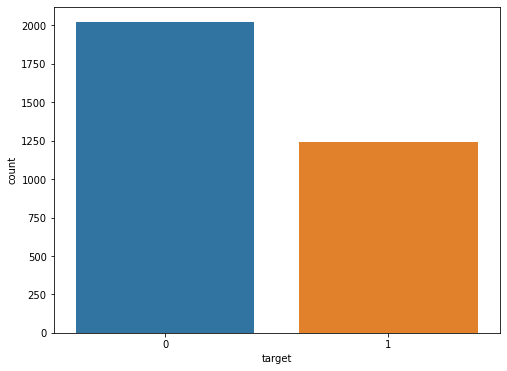

In [218]:
plt.figure(figsize=(8,6))
sns.countplot(x='target',data=submission_file)

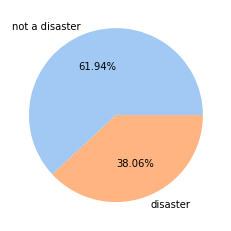

In [211]:
predict_disaster_tweets = submission_file.groupby(['target']).count()['id'][0]
predict_non_disaster_tweets = submission_file.groupby(['target']).count()['id'][1]

data = [predict_disaster_tweets, predict_non_disaster_tweets]
colors = sns.color_palette('pastel')
labels = ['not a disaster', 'disaster']
plt.pie(data, colors = colors,labels=labels,autopct = '%.2f%%')
plt.show()

## **Now let's save our new submission csv file :**

In [219]:
submission_file.to_csv('MySubmission.csv', index=False)

In [222]:
sub = pd.read_csv('MySubmission.csv')

In [229]:
sub.head(15)

,id,target
0,0,1
1,2,1
2,3,1
3,9,1
4,11,1
5,12,1
6,21,0
7,22,0
8,27,0
9,29,0


## **Great ! now , we can submit our final csv file to the Kaggle compitition 😀**

## **Kaggle Submission result 😃 :**

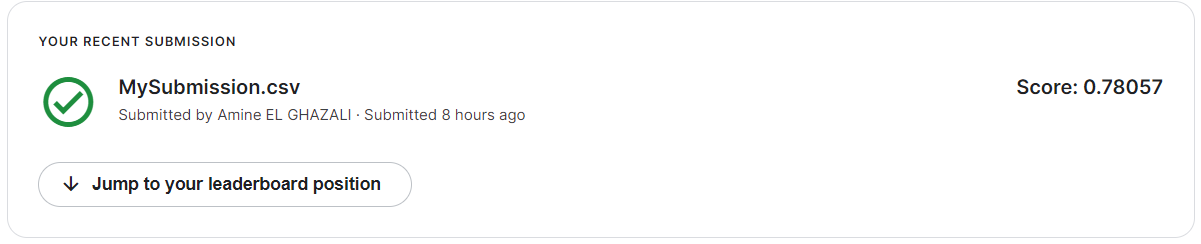

In [501]:
s = "The worst #sandstorms in months in #Iraq. In just a couple of days, dust streams swept through dozens of provinces and covered the capital #Baghdad. Visibility dropped below 500 meters.Many people are having trouble breathing.#disaster #climate #ClimateAction #news #ClimateCrisis"

In [502]:
s = clean_text(s)

In [503]:
s

'worst sandstorms months iraq couple days dust streams swept dozens provinces covered capital baghdad visibility dropped metersmany people trouble breathingdisaster climate climateaction news climatecrisis'

In [504]:
s = word_tokenize(s)

In [505]:
s

['worst',
 'sandstorms',
 'months',
 'iraq',
 'couple',
 'days',
 'dust',
 'streams',
 'swept',
 'dozens',
 'provinces',
 'covered',
 'capital',
 'baghdad',
 'visibility',
 'dropped',
 'metersmany',
 'people',
 'trouble',
 'breathingdisaster',
 'climate',
 'climateaction',
 'news',
 'climatecrisis']

In [506]:
for index ,word in enumerate(s):
  s[index] = lemma.lemmatize(word)

In [507]:
s

['worst',
 'sandstorm',
 'month',
 'iraq',
 'couple',
 'day',
 'dust',
 'stream',
 'swept',
 'dozen',
 'province',
 'covered',
 'capital',
 'baghdad',
 'visibility',
 'dropped',
 'metersmany',
 'people',
 'trouble',
 'breathingdisaster',
 'climate',
 'climateaction',
 'news',
 'climatecrisis']

In [508]:
s = ' '.join(s)

len(s)

198

In [509]:
string_test = s
# string_test_array = np.array(string_test)
# string_test_array = string_test.to_numpy()

In [510]:
# string_test_array
string_test

'worst sandstorm month iraq couple day dust stream swept dozen province covered capital baghdad visibility dropped metersmany people trouble breathingdisaster climate climateaction news climatecrisis'

In [511]:
# test_string = tf.data.Dataset.from_tensor_slices((string_test_array))
# for test_text in test_string.take(5):
#     print('Text: ', test_text.numpy())

In [ ]:
# test_dataset = test_dataset.batch(1024).prefetch(tf.data.AUTOTUNE)

In [512]:
string_one_hot = one_hot(s,VOC_SIZE)
# [one_hot(words,5000)for words in s]

len(string_one_hot)

24

In [513]:
string_one_hot

[3785,
 18142,
 3156,
 14469,
 12926,
 2446,
 14669,
 8790,
 4511,
 19244,
 19761,
 19089,
 6438,
 4247,
 18659,
 11168,
 2475,
 9239,
 5053,
 6050,
 15858,
 19143,
 13879,
 14839]

In [514]:
sent_length = 100 
string_embedded_doc = pad_sequences([string_one_hot],padding='pre',maxlen=sent_length)

print(string_embedded_doc)

[[    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0  3785 18142  3156 14469 12926  2446 14669  8790
   4511 19244 19761 19089  6438  4247 18659 11168  2475  9239  5053  6050
  15858 19143 13879 14839]]


In [498]:
# loaded_model = joblib.load('RNN_LSTM_model.pkl')

In [515]:
string_pred = loaded_model.predict(string_embedded_doc)

In [516]:
string_pred

array([[0.9037751]], dtype=float32)